<a href="https://colab.research.google.com/github/JidapaBur/TH_Avg_HouseholdIncome/blob/main/TH_Avg_HouseholdIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ความเชื่อมโยงระหว่างรายได้ รายจ่าย และ GDP ในประเทศไทย ปีพ.ศ.2554-2566
ศึกษาความสัมพันธ์ระหว่าง รายได้เฉลี่ยต่อเดือน รายจ่ายเฉลี่ยต่อเดือน และ GDP เพื่อทำความเข้าใจว่าการเติบโตทางเศรษฐกิจมีผลต่อรายได้และพฤติกรรมการใช้จ่ายของประชาชนอย่างไร โดยการวิเคราะห์ข้อมูล เราจะสามารถเห็นได้ว่า GDP ที่เพิ่มขึ้นส่งผลต่อรายได้และรายจ่ายหรือไม่ หรือมีปัจจัยอื่นที่มีผลต่อเสถียรภาพทางการเงิน

In [75]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )

Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Pandas 2.2.2
NumPy 2.0.2


##All Table Data

*   Table of Household Income
*   Table of Household Expense
*   Table of Thailand GDP







###Table of Household Income


In [66]:
url1 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_Avg_HouseholdIncome.csv"
df_income = pd.read_csv(url1)
df1 = df_income[ df_income['REGION'] == 'ทั่วราชอาณาจักร' ] [ ['YEAR', 'REGION', 'MONTHLY_INCOME'] ]
group1 = df1.groupby( ['YEAR', 'REGION'] )
tb1 = group1[['MONTHLY_INCOME'] ].agg('mean').round().reset_index()

display(tb1.head(5))

,YEAR,REGION,MONTHLY_INCOME
0,2554,ทั่วราชอาณาจักร,24457.0
1,2556,ทั่วราชอาณาจักร,26170.0
2,2558,ทั่วราชอาณาจักร,27086.0
3,2560,ทั่วราชอาณาจักร,27184.0
4,2562,ทั่วราชอาณาจักร,26212.0


###Table of Household Expense

In [67]:
url2 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_Avg_HouseholdOutcome.csv"
df_outcome = pd.read_csv(url2)
df2 = df_outcome.loc[ (df_outcome['TYPE_EXPENSE'] == 'ค่าใช้จ่ายทั้งสิ้นต่อเดือน') & (df_outcome['REGION'] == 'ทั่วราชอาณาจักร') ] [ ['YEAR', 'REGION', 'TYPE_EXPENSE','VALUE'] ].reset_index(drop=True)
group2 = df2.groupby( ['YEAR', 'REGION'] )
tb2 = group2[['VALUE'] ].agg('mean').round().reset_index()

display(tb2.head(5))

,YEAR,REGION,VALUE
0,2554,ทั่วราชอาณาจักร,18103.0
1,2556,ทั่วราชอาณาจักร,19756.0
2,2558,ทั่วราชอาณาจักร,21272.0
3,2560,ทั่วราชอาณาจักร,21607.0
4,2562,ทั่วราชอาณาจักร,20893.0


###Table of Thailand GDP

In [70]:
url3 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_GDP.csv"
df_gdp = pd.read_csv(url3)
df_gdp.head()
df3 = df_gdp.loc[ (df_gdp['Yea'] != 'Q1') & (df_gdp['Yea'] != 'Q2') & (df_gdp['Yea'] != 'Q3') & (df_gdp['Yea'] != 'Q4')] [ ['Yea', 'Gross Domestic Product'] ].reset_index(drop=True)

#BE = lambda x: x+543
#df3['Yea'].apply(BE)

df3['Yea'] = df3['Yea'].astype(int)
df3[['YEAR']] = df3[['Yea']].apply(lambda x: x+543)
df3['Gross Domestic Product'] = df3['Gross Domestic Product'].str.replace(',', '').astype(float)
df3[['GDP_Month']] = df3[['Gross Domestic Product']].apply(lambda x: x/12).round()
df3.head()

tb3 = df3[['YEAR', 'GDP_Month']]

tb3.head(5)

,YEAR,GDP_Month
0,2536,271952.0
1,2537,307424.0
2,2538,351468.0
3,2539,386550.0
4,2540,392526.0


### Merge 3 tables (Income, Expense, GDP)

In [73]:
#Merge Table of income and expense

tb12 = pd.merge(tb1, tb2, on=['YEAR', 'REGION'], how='inner')
tb12 = tb12.reset_index(drop=True)

#Rename Columns
tb_inner = tb12.rename(columns={'MONTHLY_INCOME': 'Income', 'VALUE': 'Expense'})
tb = tb_inner[[ 'YEAR', 'Income', 'Expense']]


#Merge Table of GDP
tb13 = pd.merge(tb, tb3, on=['YEAR'], how='inner')
tb13 = tb13.rename(columns={'Income':'INCOME_Month', 'Expense':'EXPENSE_Month'})
tb_merge = tb13[[ 'YEAR', 'INCOME_Month', 'EXPENSE_Month', 'GDP_Month']]

display(tb_merge.head(10))

,YEAR,INCOME_Month,EXPENSE_Month,GDP_Month
0,2554,24457.0,18103.0,942242.0
1,2556,26170.0,19756.0,1076263.0
2,2558,27086.0,21272.0,1145290.0
3,2560,27184.0,21607.0,1290722.0
4,2562,26212.0,20893.0,1407431.0
5,2564,27537.0,21763.0,1349051.0
6,2566,29165.0,23802.0,1493503.0


## Trend Analysis

In [82]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import plotly

print( f"Matplotlib {mpl.__version__}" )
print( f"Matplotlib backend: {mpl.get_backend()}")
print(f'Pandas {pd.__version__} [Plotting backend = {pd.options.plotting.backend}]')
print(f'Plotly {plotly.__version__}')

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated, 'ggplot'

Matplotlib 3.10.0
Matplotlib backend: module://matplotlib_inline.backend_inline
Pandas 2.2.2 [Plotting backend = matplotlib]
Plotly 5.24.1


###Graph1

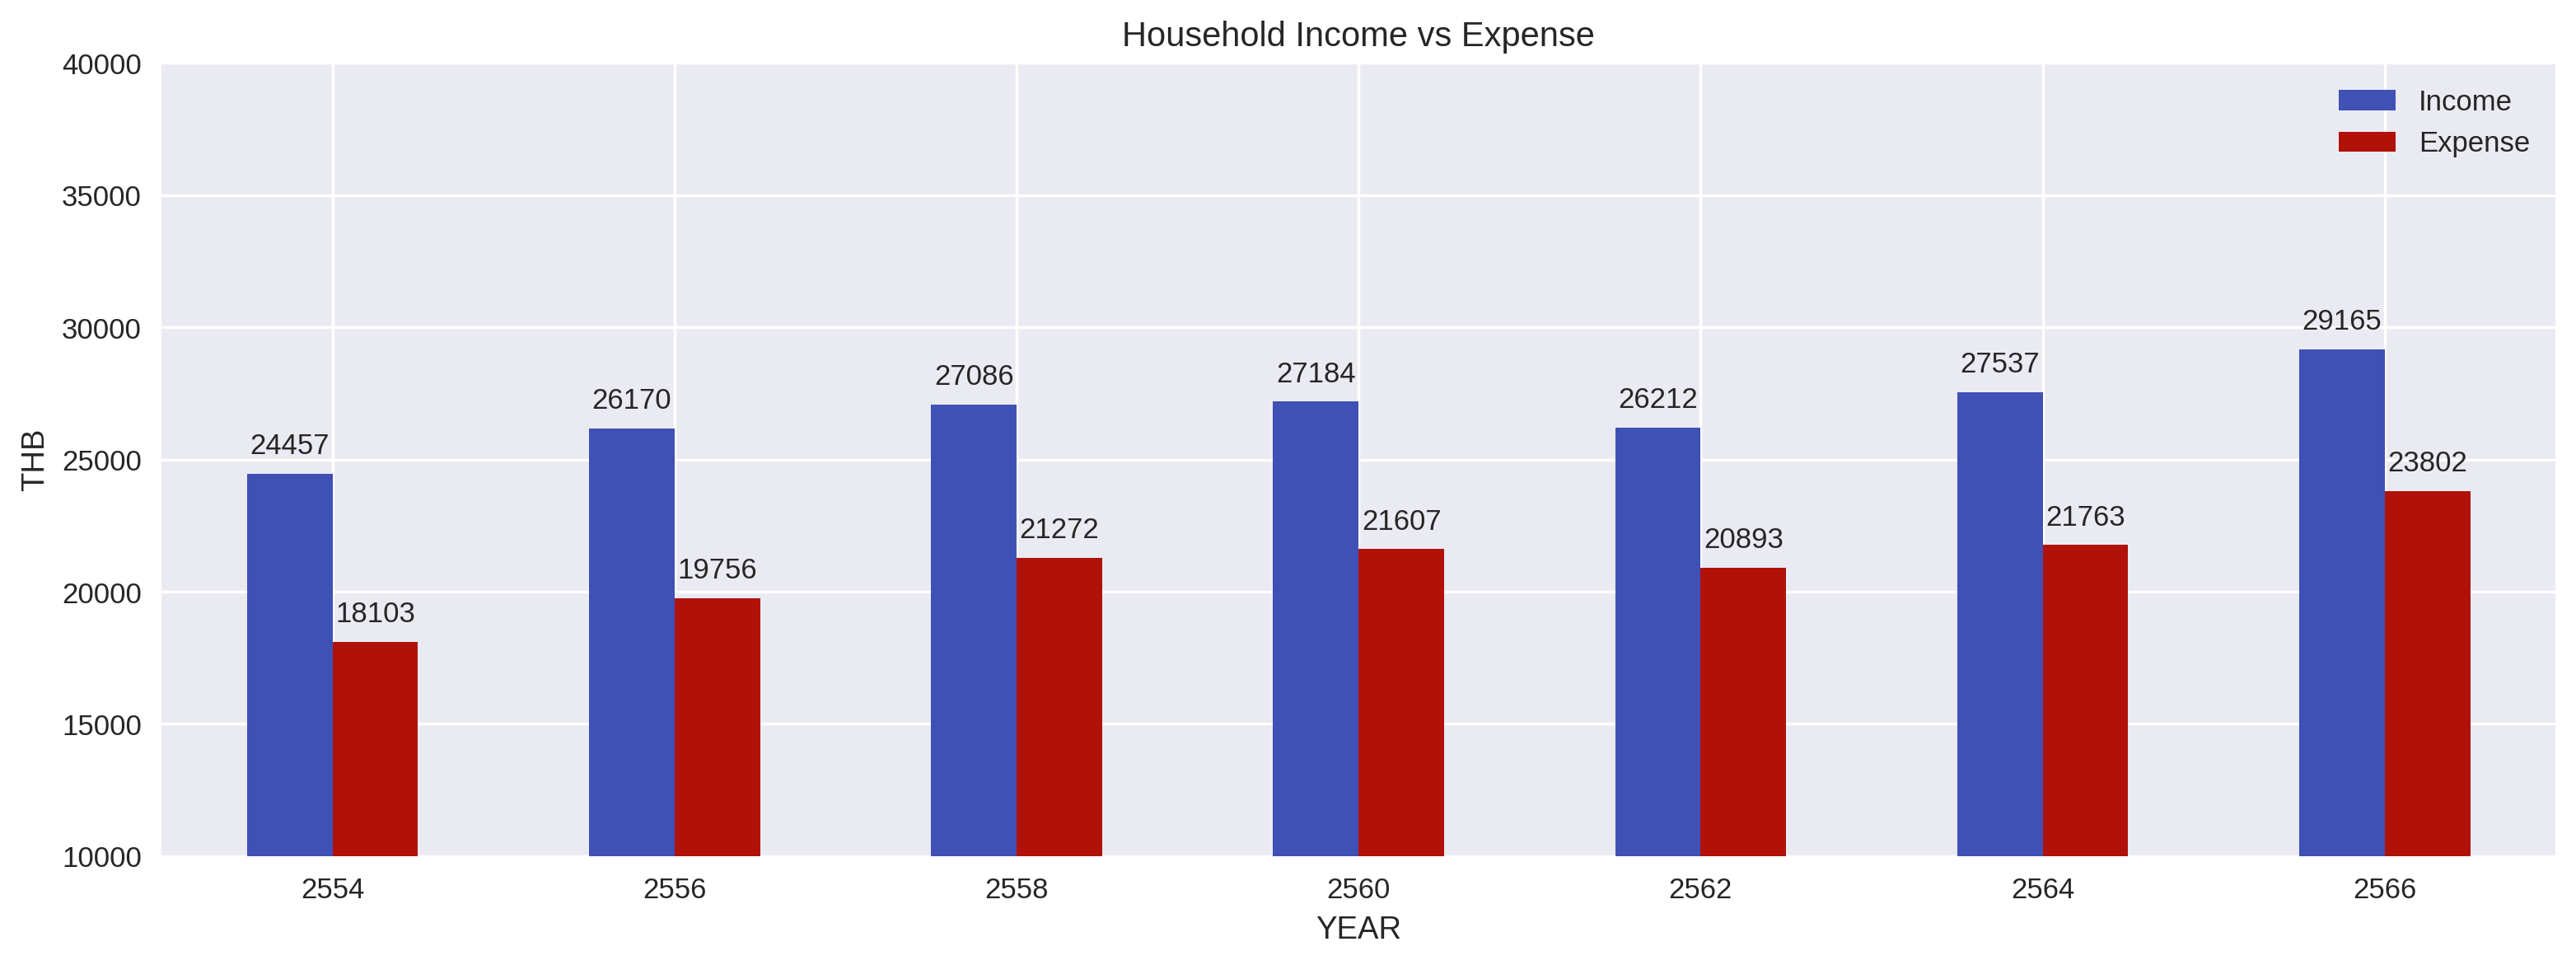

In [105]:
#Figure setting
plt.figure(figsize=(15,5),dpi=250)

#plt.bar(x - 0.5, y[0], width=1 )   # Shift bars to the left to avoid overlapping
#plt.bar(x + 0.5, y[1], width=1)    # Shift bars to the right to avoid overlapping

# Store the current axes in a separated variable
ax = plt.gca()

# Plot: Alternative 1
tb.plot.bar(ax=ax, x='YEAR', y = ['Income','Expense'],color=['#3f51b5', '#b0120a'], title='Household Income vs Expense', ylabel='THB' )

_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=0, horizontalalignment='center' )

#custom y-exis
plt.ylim(10000, 40000)

#Show value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=5)

#Save png
plt.savefig('monthly_income_expense.png')
plt.show()